In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime,timedelta

In [2]:
end = (datetime.now() - timedelta(30*7)).strftime("%Y%m%d")
start = (datetime.now() - timedelta(365*3)).strftime("%Y%m%d")
end

'20240822'

In [3]:
parameter = {
    'start' : start,
    'end' : end,
    'latitude' : '-6.9',
    'longitude' : '107.62',
    'community' : 're',
    'parameters' : 'T2M,QV2M,PS,ALLSKY_SFC_SW_DWN',
    'format' : 'json',
    'header' : 'true',
    'time-standard' : 'lst'
}

respond = requests.get('https://power.larc.nasa.gov/api/temporal/hourly/point?',params=parameter)
data = respond.json()
df = pd.DataFrame(data['properties']['parameter'])
df = df.reset_index()
df

,index,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN
0,2022032100,20.10,15.75,90.91,0.0
1,2022032101,20.02,15.70,90.85,0.0
2,2022032102,19.95,15.67,90.79,0.0
3,2022032103,19.89,15.60,90.78,0.0
4,2022032104,19.76,15.48,90.81,0.0
...,...,...,...,...,...
21259,2024082219,20.74,16.09,91.21,-999.0
21260,2024082220,20.29,15.92,91.28,-999.0
21261,2024082221,19.91,15.77,91.32,-999.0
21262,2024082222,19.64,15.57,91.32,-999.0


In [4]:
df.rename(columns={"index": "time"},inplace=True)


In [5]:
df.describe()

,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN
count,21264.000000,21264.000000,21264.000000,21264.000000
mean,21.829771,15.908794,90.951238,174.480240
std,2.746217,1.340096,0.158112,334.096741
min,13.950000,10.860000,90.410000,-999.000000
25%,19.790000,15.070000,90.840000,0.000000
50%,21.350000,16.020000,90.950000,0.000000
75%,23.980000,16.850000,91.060000,408.312500
max,30.170000,19.570000,91.500000,1024.150000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21264 entries, 0 to 21263
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               21264 non-null  object 
 1   T2M                21264 non-null  float64
 2   QV2M               21264 non-null  float64
 3   PS                 21264 non-null  float64
 4   ALLSKY_SFC_SW_DWN  21264 non-null  float64
dtypes: float64(4), object(1)
memory usage: 830.8+ KB


In [7]:
df[df.ALLSKY_SFC_SW_DWN == -999]


,time,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN
15984,2024011600,20.72,16.53,90.80,-999.0
15985,2024011601,20.51,16.30,90.74,-999.0
15986,2024011602,20.25,16.03,90.72,-999.0
15987,2024011603,19.96,15.75,90.72,-999.0
15988,2024011604,19.63,15.46,90.75,-999.0
...,...,...,...,...,...
21259,2024082219,20.74,16.09,91.21,-999.0
21260,2024082220,20.29,15.92,91.28,-999.0
21261,2024082221,19.91,15.77,91.32,-999.0
21262,2024082222,19.64,15.57,91.32,-999.0


In [8]:
df.replace(-999.0 ,0.0 , inplace=True)

In [9]:
df

,time,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN
0,2022032100,20.10,15.75,90.91,0.0
1,2022032101,20.02,15.70,90.85,0.0
2,2022032102,19.95,15.67,90.79,0.0
3,2022032103,19.89,15.60,90.78,0.0
4,2022032104,19.76,15.48,90.81,0.0
...,...,...,...,...,...
21259,2024082219,20.74,16.09,91.21,0.0
21260,2024082220,20.29,15.92,91.28,0.0
21261,2024082221,19.91,15.77,91.32,0.0
21262,2024082222,19.64,15.57,91.32,0.0


In [10]:
df['datetime'] = pd.to_datetime(df['time'], format='%Y%m%d%H')
df

,time,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN,datetime
0,2022032100,20.10,15.75,90.91,0.0,2022-03-21 00:00:00
1,2022032101,20.02,15.70,90.85,0.0,2022-03-21 01:00:00
2,2022032102,19.95,15.67,90.79,0.0,2022-03-21 02:00:00
3,2022032103,19.89,15.60,90.78,0.0,2022-03-21 03:00:00
4,2022032104,19.76,15.48,90.81,0.0,2022-03-21 04:00:00
...,...,...,...,...,...,...
21259,2024082219,20.74,16.09,91.21,0.0,2024-08-22 19:00:00
21260,2024082220,20.29,15.92,91.28,0.0,2024-08-22 20:00:00
21261,2024082221,19.91,15.77,91.32,0.0,2024-08-22 21:00:00
21262,2024082222,19.64,15.57,91.32,0.0,2024-08-22 22:00:00


In [11]:
new_df = df[['datetime','ALLSKY_SFC_SW_DWN']]
new_df = new_df.set_index('datetime')
new_df

,ALLSKY_SFC_SW_DWN
datetime,
2022-03-21 00:00:00,0.0
2022-03-21 01:00:00,0.0
2022-03-21 02:00:00,0.0
2022-03-21 03:00:00,0.0
2022-03-21 04:00:00,0.0
...,...
2024-08-22 19:00:00,0.0
2024-08-22 20:00:00,0.0
2024-08-22 21:00:00,0.0


<Axes: xlabel='datetime'>

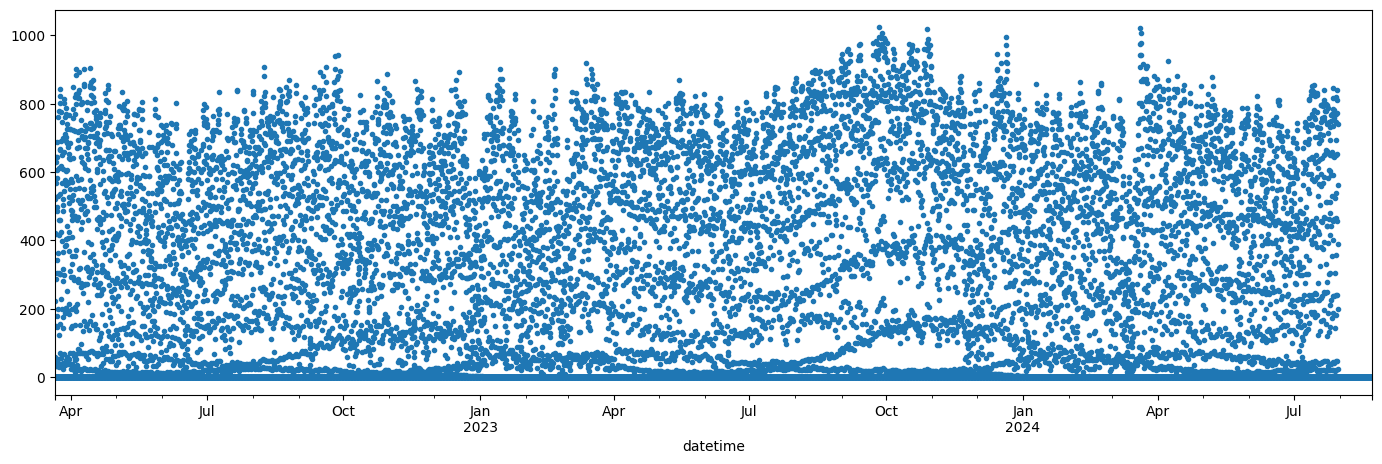

In [12]:
new_df['ALLSKY_SFC_SW_DWN'].plot(style='.', figsize=(17,5))


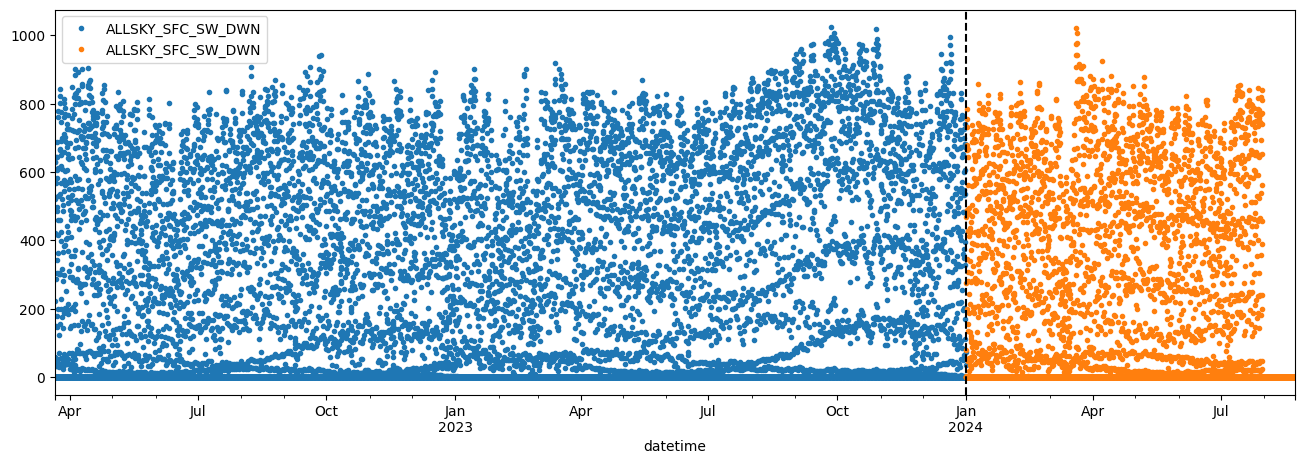

In [13]:
train = new_df.loc[new_df.index < '01-01-2024']
test = new_df.loc[new_df.index >= '01-01-2024']

fig, ax = plt.subplots(figsize=(16,5))
train.plot(ax=ax , label='train',style='.')
test.plot(ax=ax, label='test',style='.')
ax.axvline('01-01-2024',color='black',ls='--')
plt.show()

In [14]:
def create_features(df):
  df['hour'] = df.index.hour
  df['dayofweek'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['dayofyear'] = df.index.dayofyear
  return df

In [15]:
data_df = create_features(new_df)
data_df

,ALLSKY_SFC_SW_DWN,hour,dayofweek,quarter,month,year,dayofyear
datetime,,,,,,,
2022-03-21 00:00:00,0.0,0,0,1,3,2022,80
2022-03-21 01:00:00,0.0,1,0,1,3,2022,80
2022-03-21 02:00:00,0.0,2,0,1,3,2022,80
2022-03-21 03:00:00,0.0,3,0,1,3,2022,80
2022-03-21 04:00:00,0.0,4,0,1,3,2022,80
...,...,...,...,...,...,...,...
2024-08-22 19:00:00,0.0,19,3,3,8,2024,235
2024-08-22 20:00:00,0.0,20,3,3,8,2024,235
2024-08-22 21:00:00,0.0,21,3,3,8,2024,235


In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21264 entries, 2022-03-21 00:00:00 to 2024-08-22 23:00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ALLSKY_SFC_SW_DWN  21264 non-null  float64
 1   hour               21264 non-null  int32  
 2   dayofweek          21264 non-null  int32  
 3   quarter            21264 non-null  int32  
 4   month              21264 non-null  int32  
 5   year               21264 non-null  int32  
 6   dayofyear          21264 non-null  int32  
dtypes: float64(1), int32(6)
memory usage: 830.6 KB


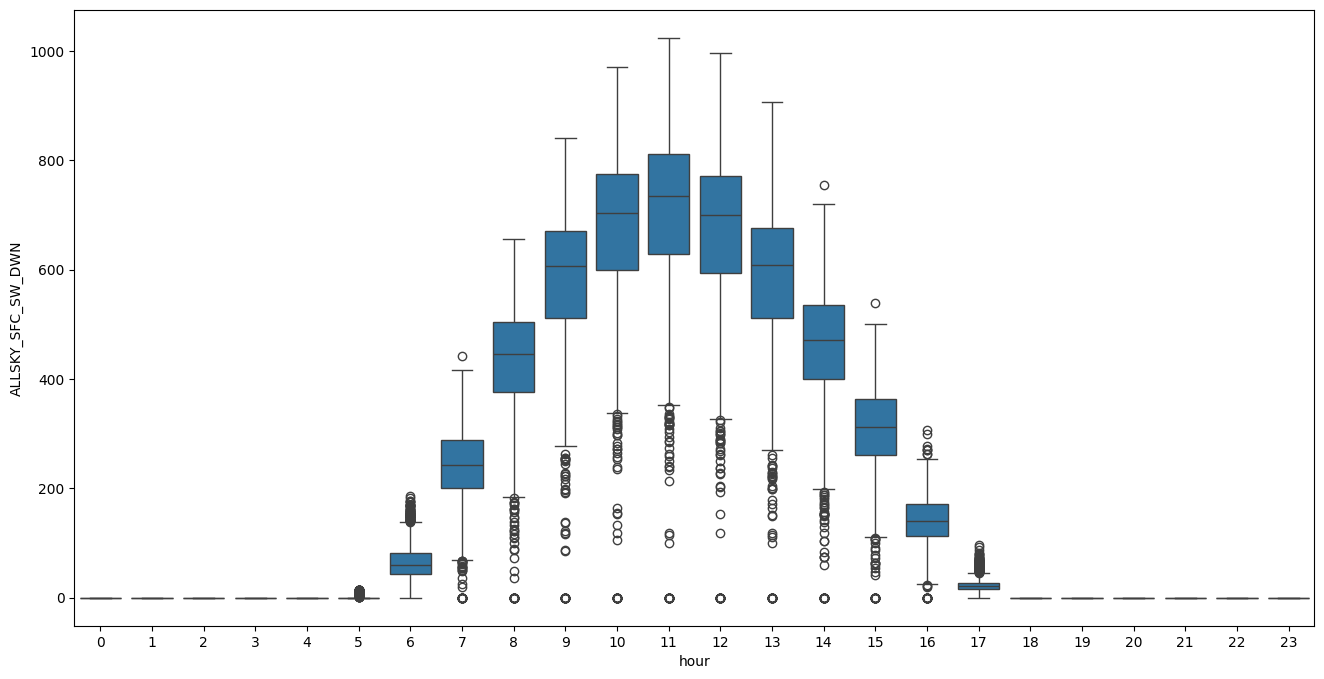

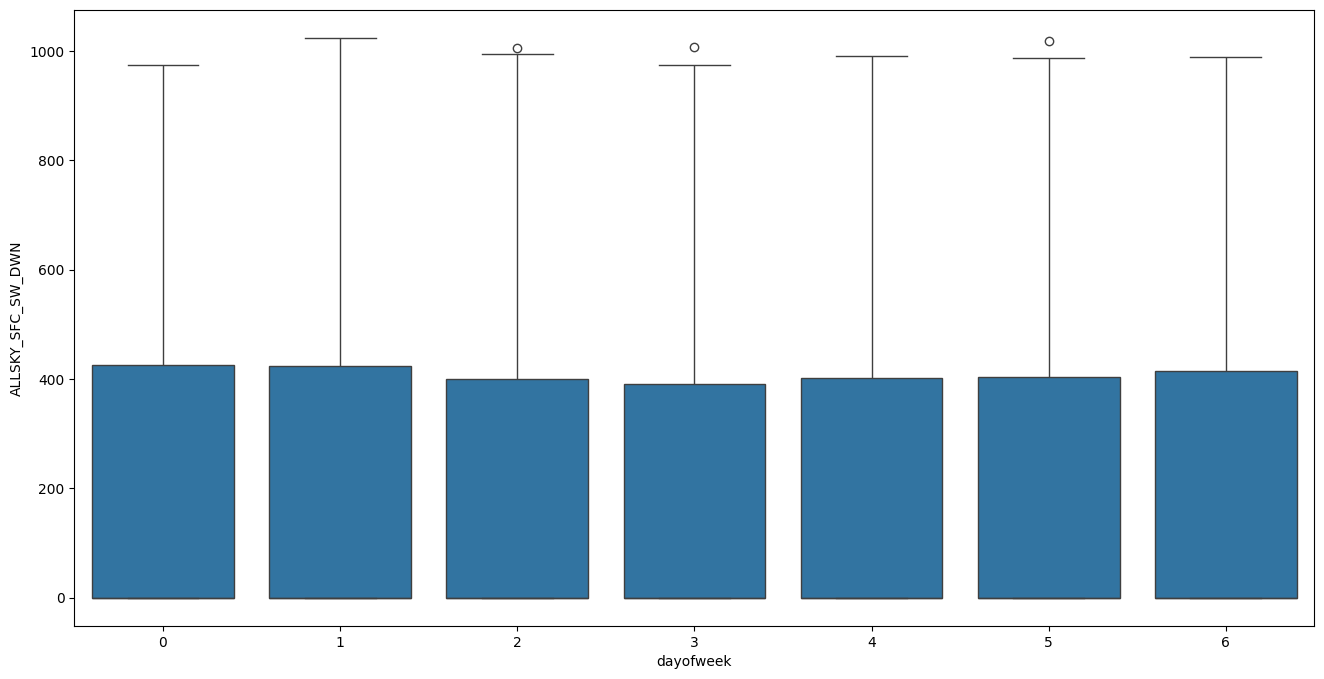

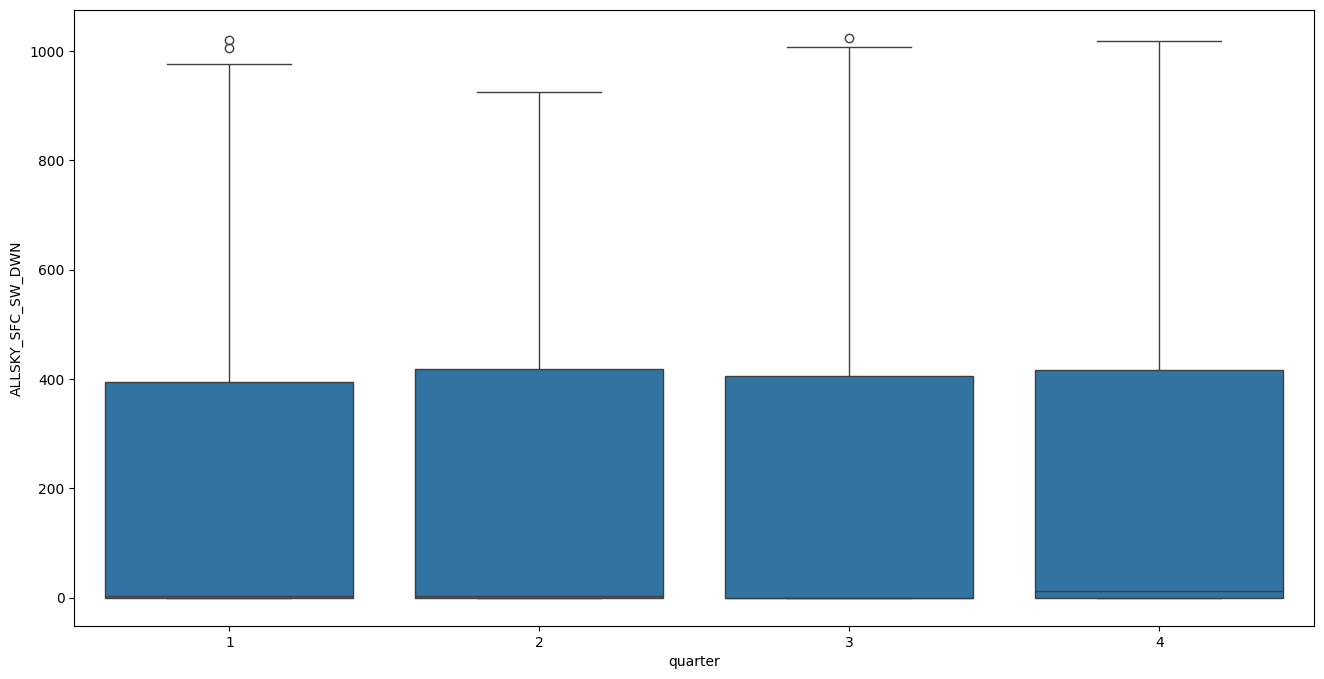

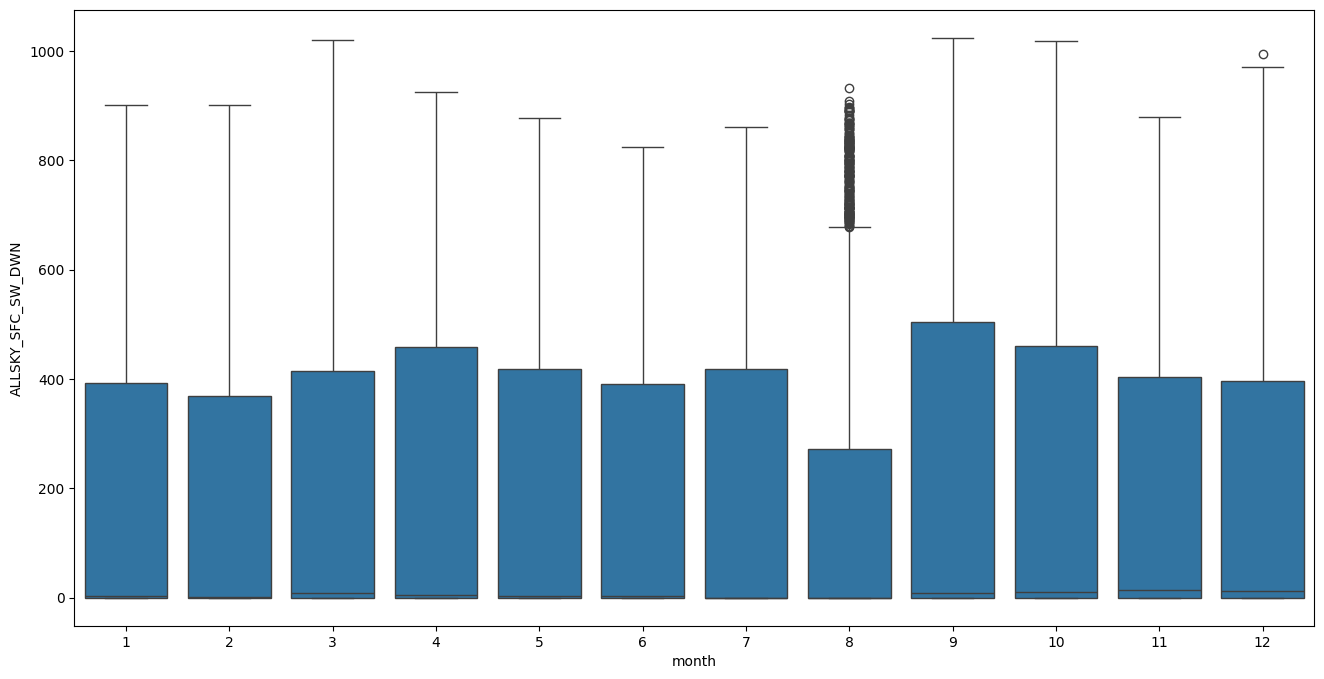

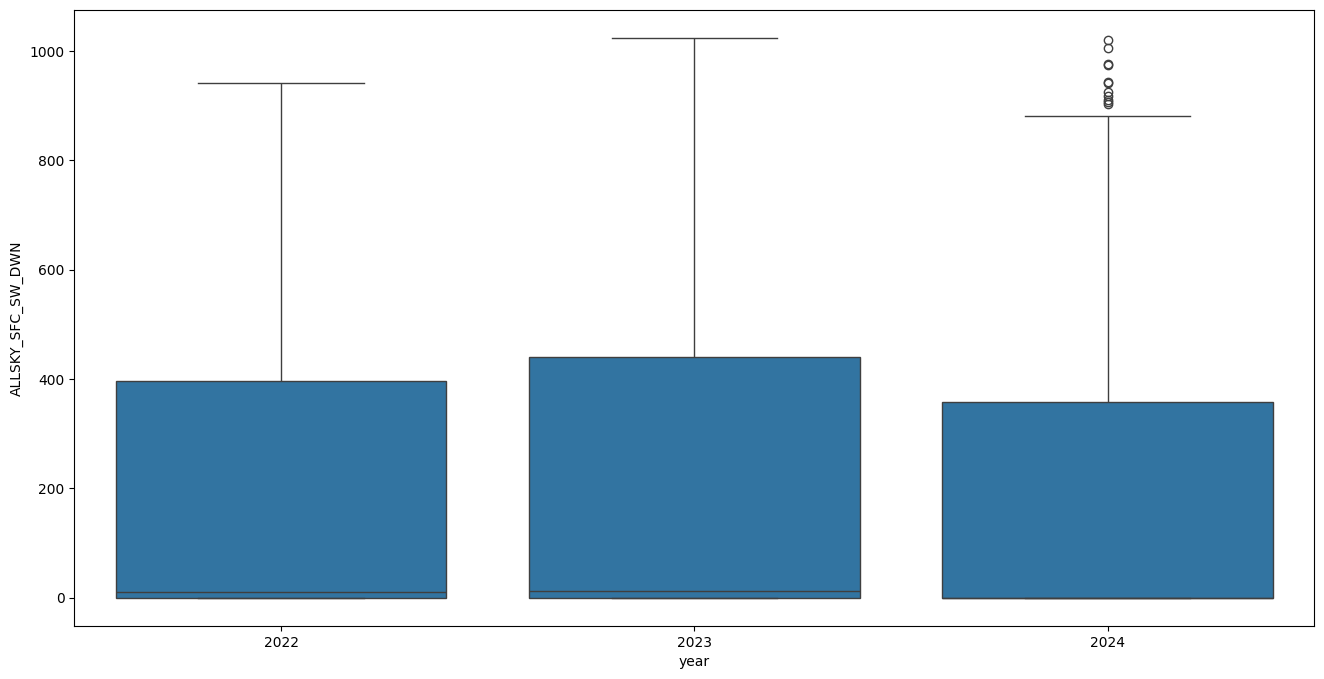

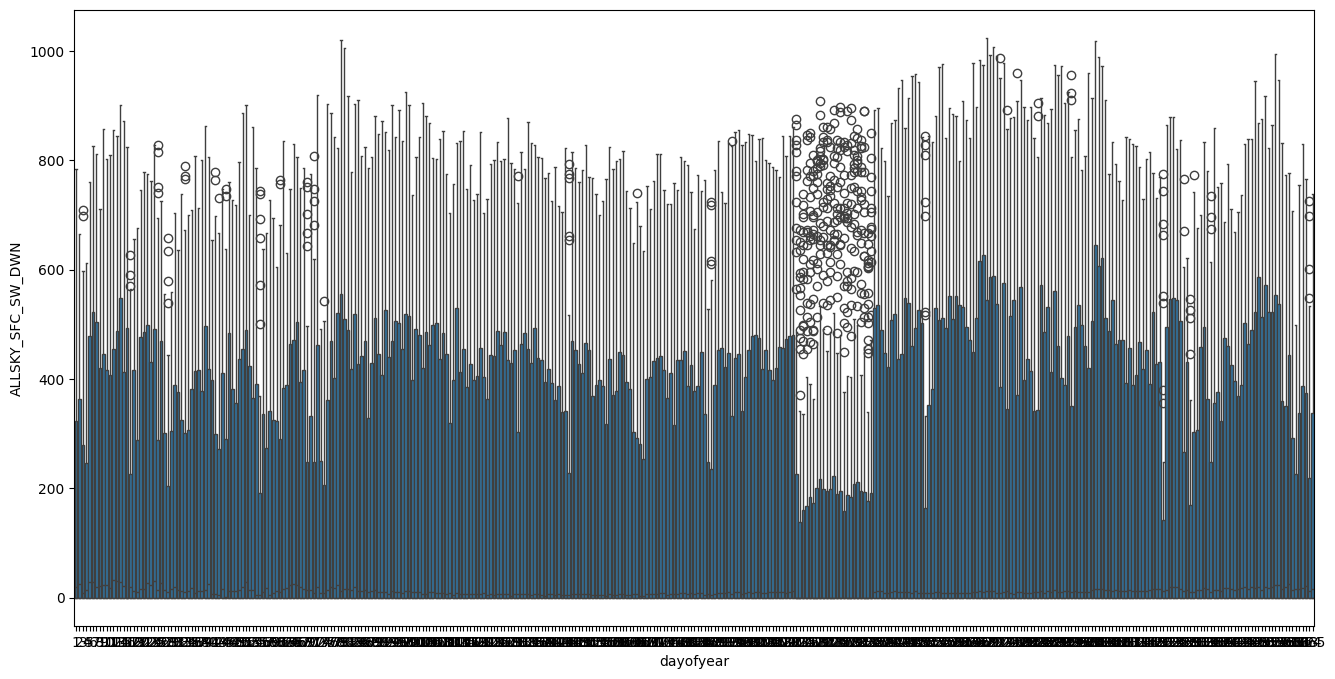

In [17]:
column = ['hour','dayofweek','quarter','month','year','dayofyear']
for i in column:
  fig, ax = plt.subplots(figsize=(16,8))
  sns.boxplot(data=data_df, x =i,y='ALLSKY_SFC_SW_DWN')
  plt.show()

In [18]:
df.to_csv('irradiance_dataset', encoding='utf-8', index=False)